In [1]:
# ================================
# !!! DEGRADE IRF THROUGH AEFF !!!
# ================================

# IMPORTS ---!
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from module_plot import degradedIRF_3d
from module_analysis import degrade_IRF

import os
import sys
import subprocess

# check permissions ---!
if os.geteuid() == 0:
    print("We're root!")
else:
    print("We're not root.")

# setup ---!
pathout = '/usr/local/gamma/share/caldb/data/cta/degr2/bcf/'
pathin = '/usr/local/gamma/share/caldb/data/cta/prod2/bcf/'
folder = 'South_0.5h/'
irf = pathin + folder + 'irf_file.fits'
degraded_irf = pathout + folder + 'irf_file.fits'

with fits.open(irf) as hdul :
    aeff = hdul['EFFECTIVE AREA'].data['EFFAREA'][:]
    print(hdul[4].header.keys())

degrade_IRF(irf, degraded_irf, factor=2)
    
with fits.open(degraded_irf) as hdul :
    aeff2 = hdul['EFFECTIVE AREA'].data['EFFAREA'][:]
    

We're not root.
<generator object Header.__iter__ at 0x7f80e3c84db0>


TypeError: can't multiply sequence by non-int of type 'float'

(45, 500) (45, 500) (45, 500)


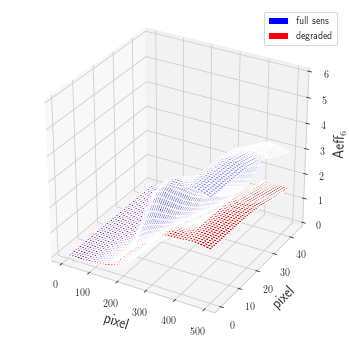

In [6]:
# ====================
# !!! PLOT AEFF 3D !!!
# ====================

from mpl_toolkits.mplot3d import Axes3D

savefig = 'IRF2_degrading_Aeff.png'
fontsize=14
plt.rc('text', usetex=True)
sns.set_style("whitegrid", {'axes.grid' : False})

x = np.array(range(len(aeff[:][0])))
y = np.array(range(len(aeff[0][0][:])))
xx, yy = np.meshgrid(y, x)

aeff_flat = aeff[0]
aeff2_flat = aeff2[0]
print(xx.shape, yy.shape, aeff_flat.shape)

degradedIRF_3d(xx, yy, [aeff_flat/1e6, aeff2_flat/1e6], xlabel='pixel', ylabel='pixel', 
               zlabel='Aeff$_6$', title=None, fontsize=fontsize, zlim=(0,6), alpha=[0.4, 1], 
               c=['b', 'r'], label=['full sens', 'degraded'], savefig=savefig)




In [19]:
from astropy.io import fits

# setup ---!
pathout = '/usr/local/gamma/share/caldb/data/cta/degr2/bcf/'
pathin = '/usr/local/gamma/share/caldb/data/cta/prod2/bcf/'
folder = 'South_0.5h/'
irf = pathin + folder + 'irf_file.fits'
degraded_irf = pathout + folder + 'irf_file.fits'
factor = 3

extension = ['EFFECTIVE AREA', 'BACKGROUND']
field = [4, 6]
#  field = ['EFFAREA', 'BKG']
inv = 1/factor
with fits.open(irf) as hdul:
    col = [[],[]]
    for i in range(len(extension)):
        col[i].append(hdul[extension[i]].data.field(field[i])[:].astype(float))

#print(col[0], '\n-----\n', col[1])
        
a = col[0] * inv
b = col[1] / col[0] * (col[0] * inv)
tmp = [a, b]

with fits.open(degraded_irf, mode='update') as hdul:
    for i in range(len(extension)) :
        hdul[extension[i]].data.field(field[i])[:] = tmp[i]
    # save changes ---!
    hdul.flush

[array([[[      0.  ,       0.  ,       0.  , ..., 3942952.75,
         3939271.25, 3935649.25],
        [      0.  ,       0.  ,       0.  , ..., 3938233.75,
         3934556.5 , 3930939.  ],
        [      0.  ,       0.  ,       0.  , ..., 3933514.5 ,
         3929842.  , 3926228.75],
        ...,
        [      0.  ,       0.  ,       0.  , ..., 3047786.25,
         3044940.5 , 3042140.75],
        [      0.  ,       0.  ,       0.  , ..., 3005259.75,
         3002453.75, 2999693.25],
        [      0.  ,       0.  ,       0.  , ..., 2962733.5 ,
         2959967.25, 2957245.75]]])] 
-----
 [array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [0.000000

TypeError: can't multiply sequence by non-int of type 'float'